# Module 2- Plotting in Financial Markets


   ### Welcome to the Answer notebook for Module 2 ! 
Make sure that you've submitted the module 1 notebook and unlocked Module 2 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import math

In [2]:
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
df=pd.read_csv("week2.csv")
df.dtypes

Unnamed: 0                  int64
index                       int64
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Month                       int64
Year                        int64
Day_Perc_Change           float64
Trend                      object
dtype: object

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df.drop(['Unnamed: 0','index'],axis=1,inplace=True)
df.set_index('Date',drop=False,inplace=True)
df.dtypes

Series                            object
Date                      datetime64[ns]
Prev Close                       float64
Open Price                       float64
High Price                       float64
Low Price                        float64
Last Price                       float64
Close Price                      float64
Average Price                    float64
Total Traded Quantity              int64
Turnover                         float64
No. of Trades                      int64
Deliverable Qty                    int64
% Dly Qt to Traded Qty           float64
Month                              int64
Year                               int64
Day_Perc_Change                  float64
Trend                             object
dtype: object

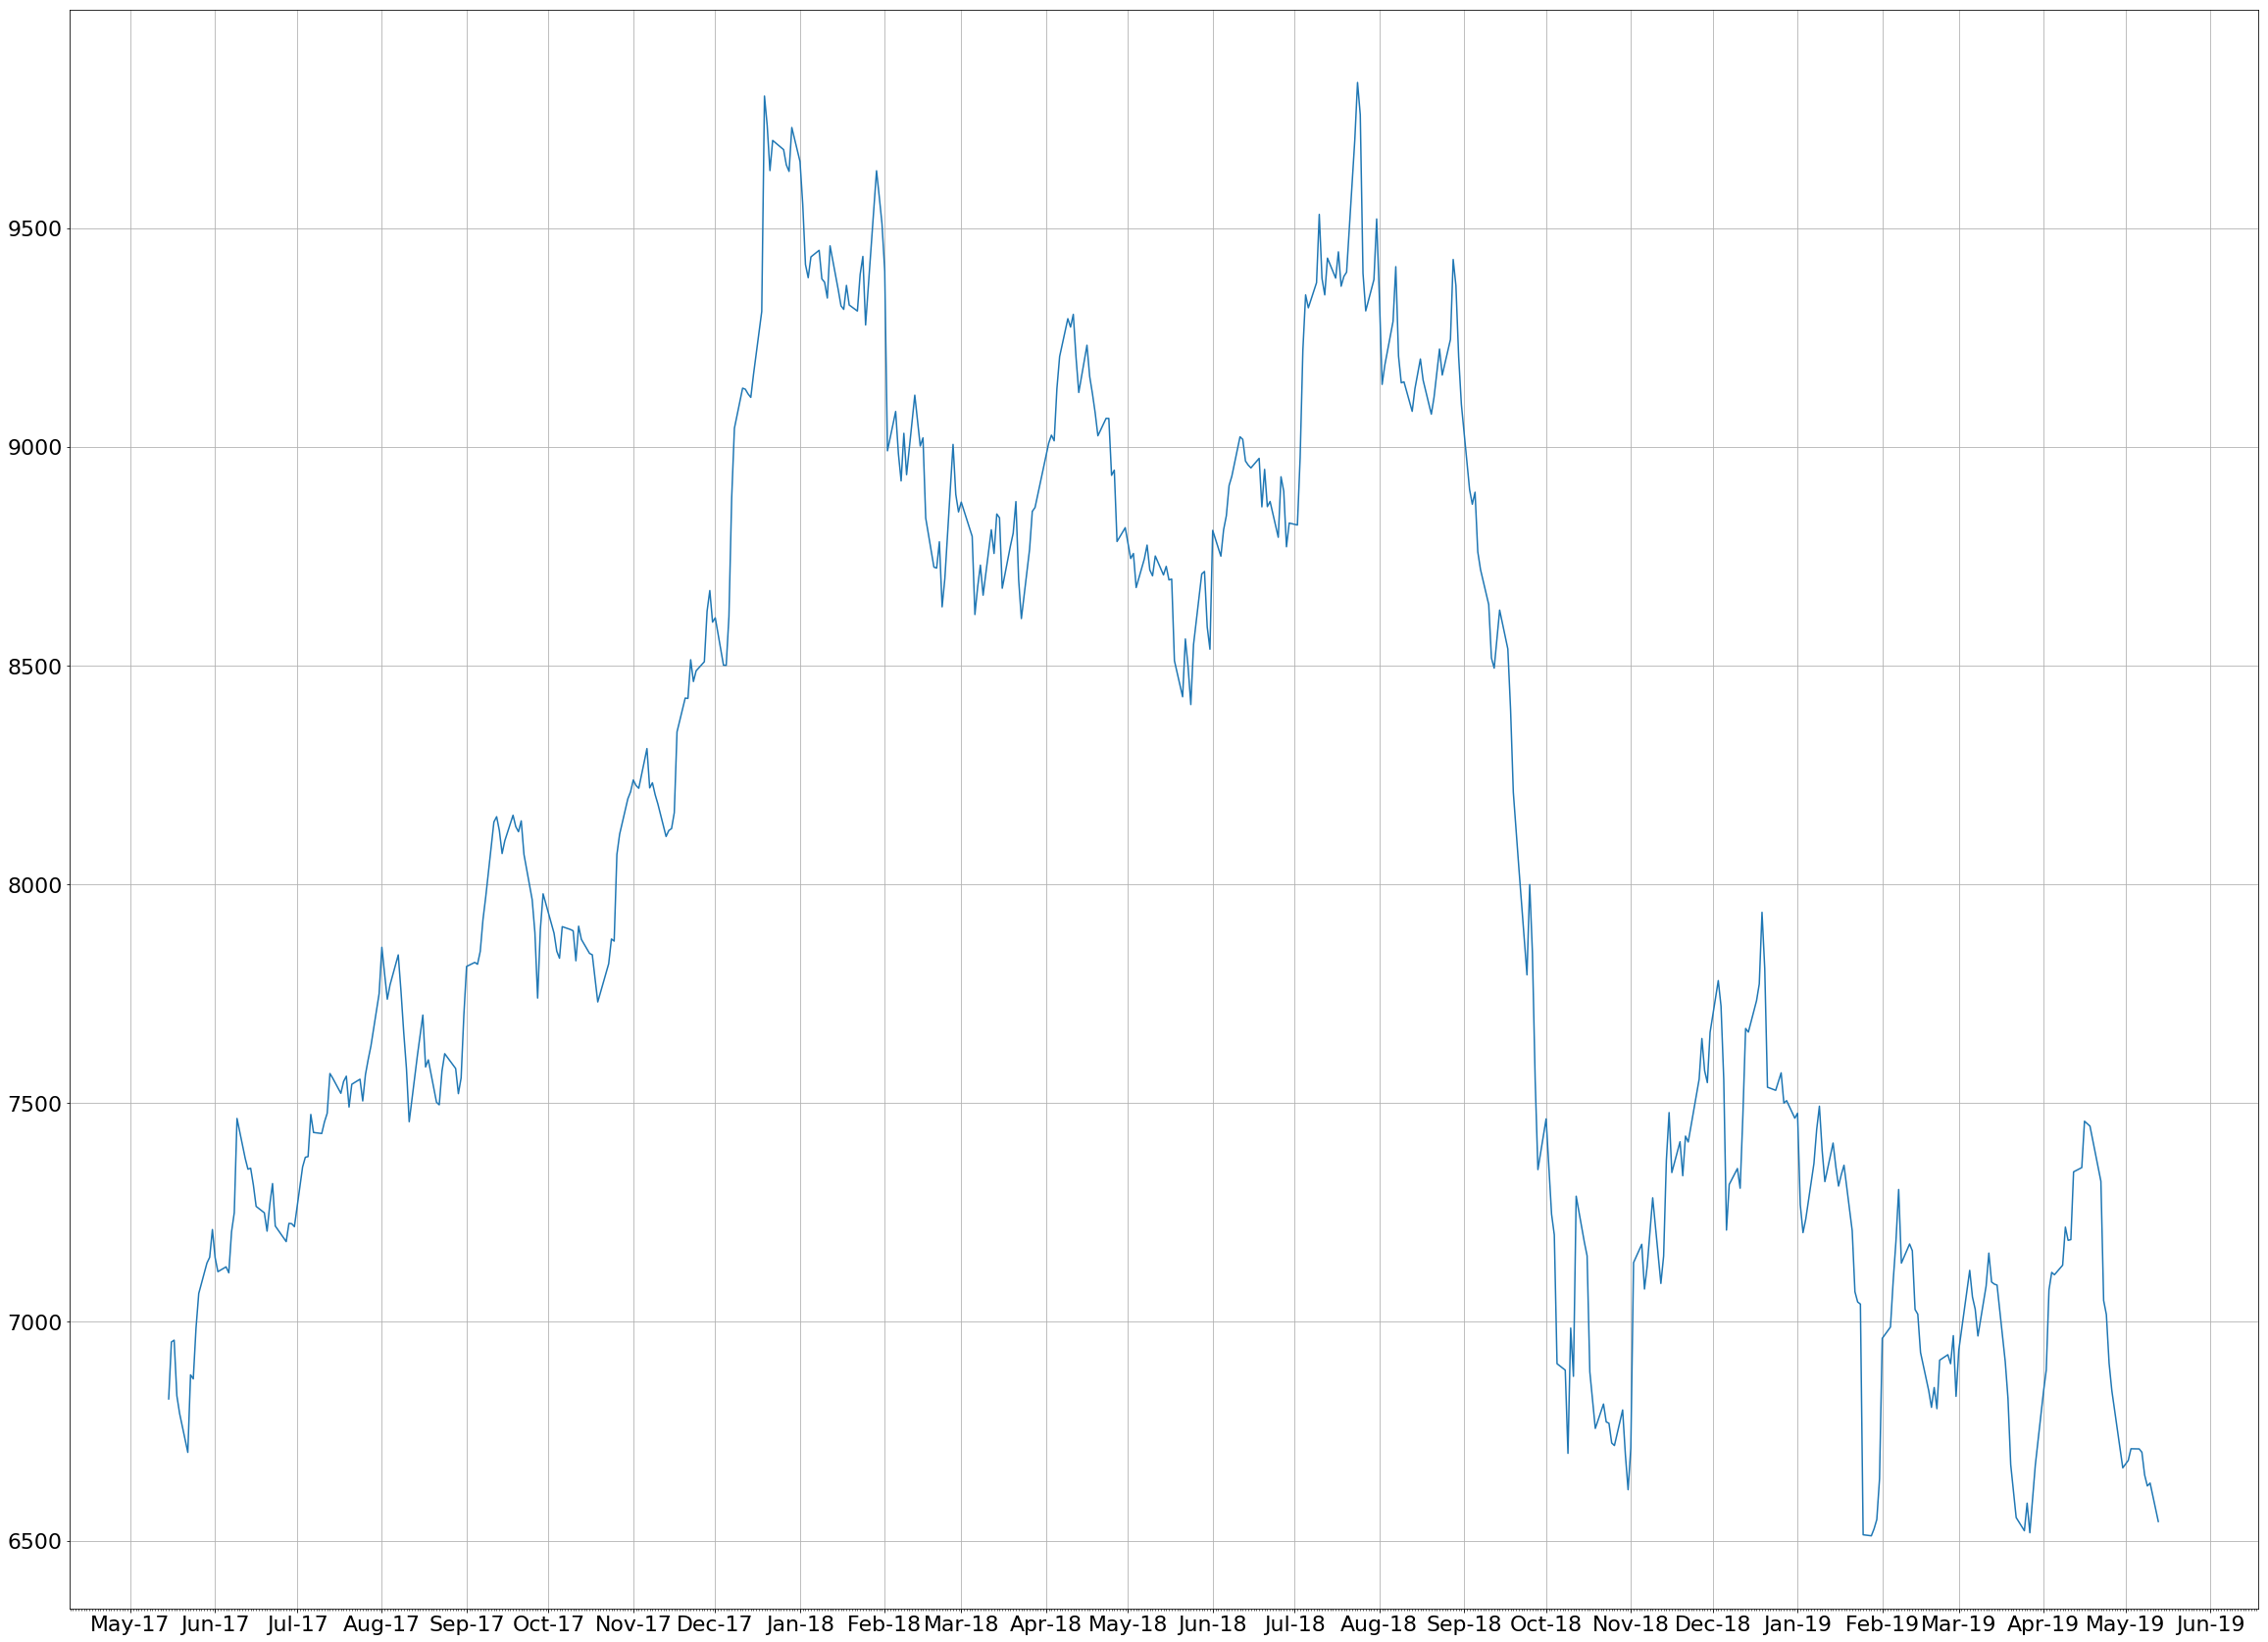

In [5]:
fig, ax = plt.subplots(figsize=(40,30))
ax.plot_date(df["Date"], df['Close Price'], '-')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.grid(True)
plt.show()


### Query 2.2 
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using plt.stem() function

>Display a stem plot of the daily change in stock price. This column was calculated in module 1 and should be already avaialble in week2.csv. Observe whenever there is a large change.

<StemContainer object of 3 artists>

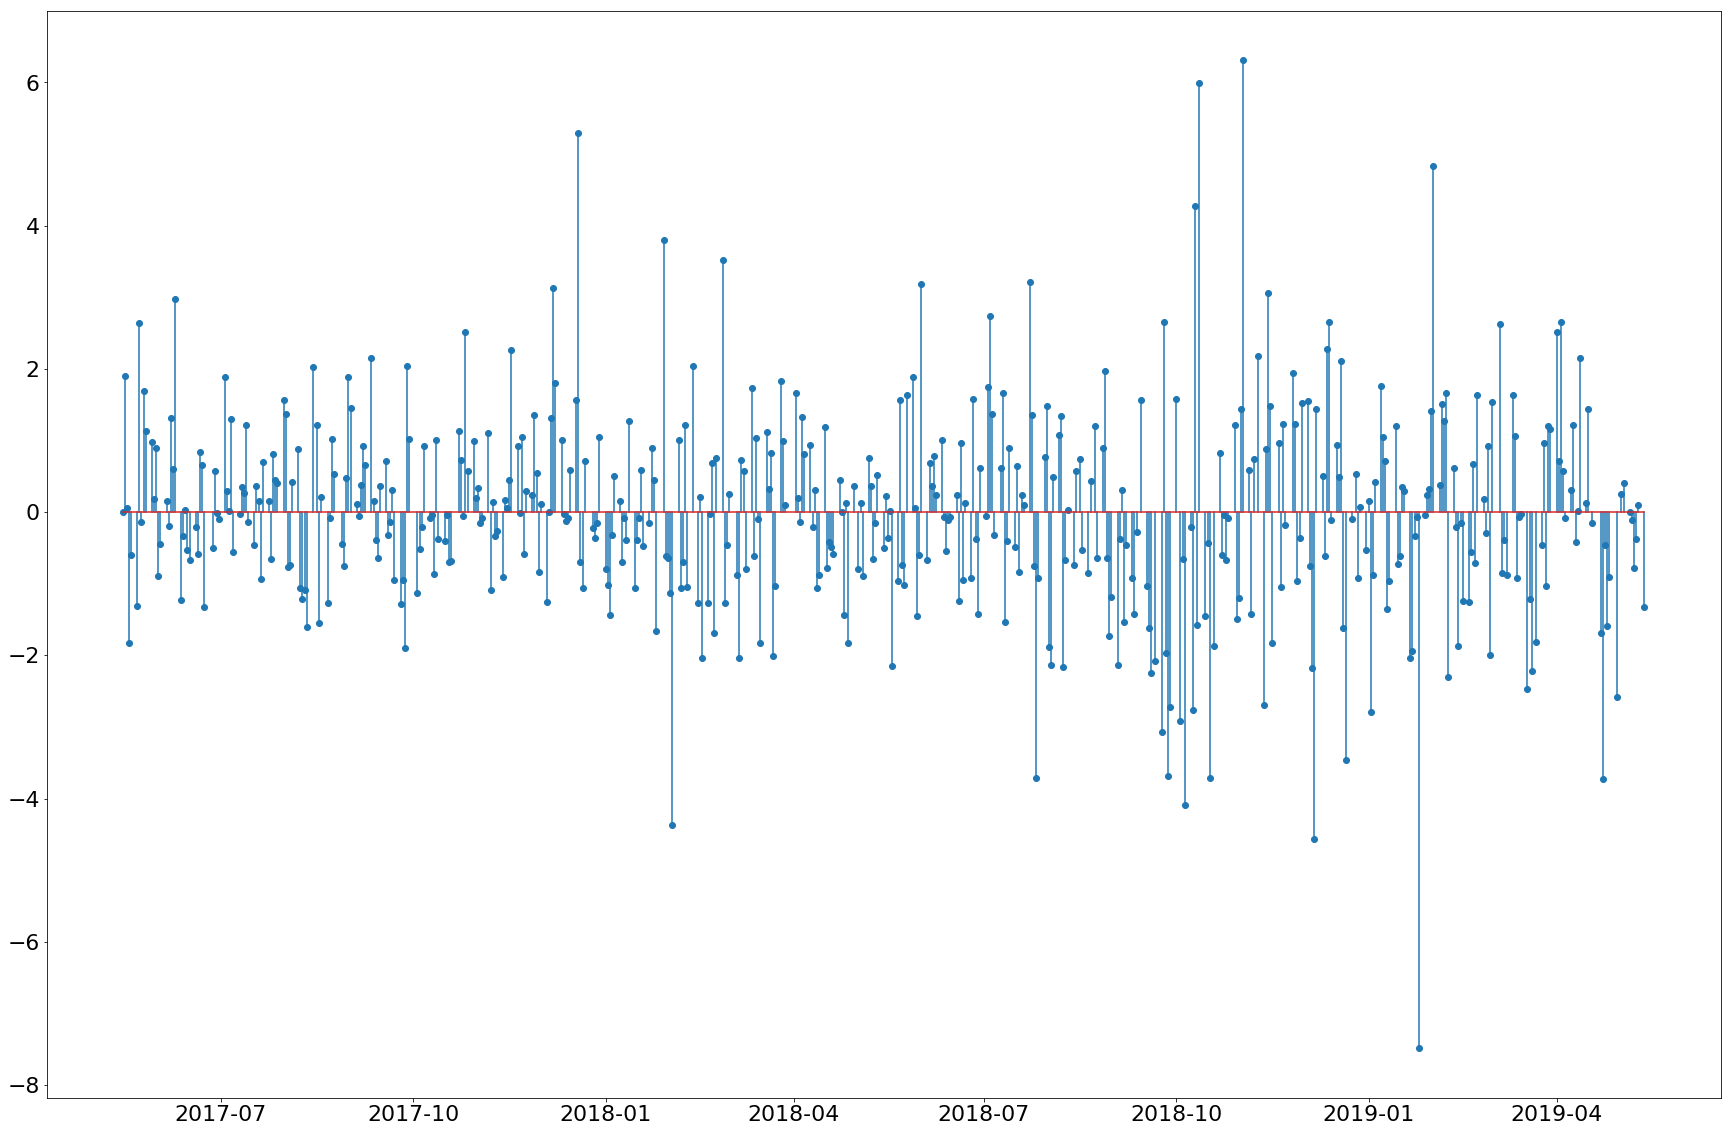

In [6]:
fig1, ax1 = plt.subplots(figsize=(30,20))
plt.stem(df['Date'],df['Day_Perc_Change'])

### Query 2.3 
Plot the daily volmes as well as compare the precentage stem plot to it. Docment your ananlysis of relationship between volme and daily percentage change

(-2491149.0, 3508851.0)

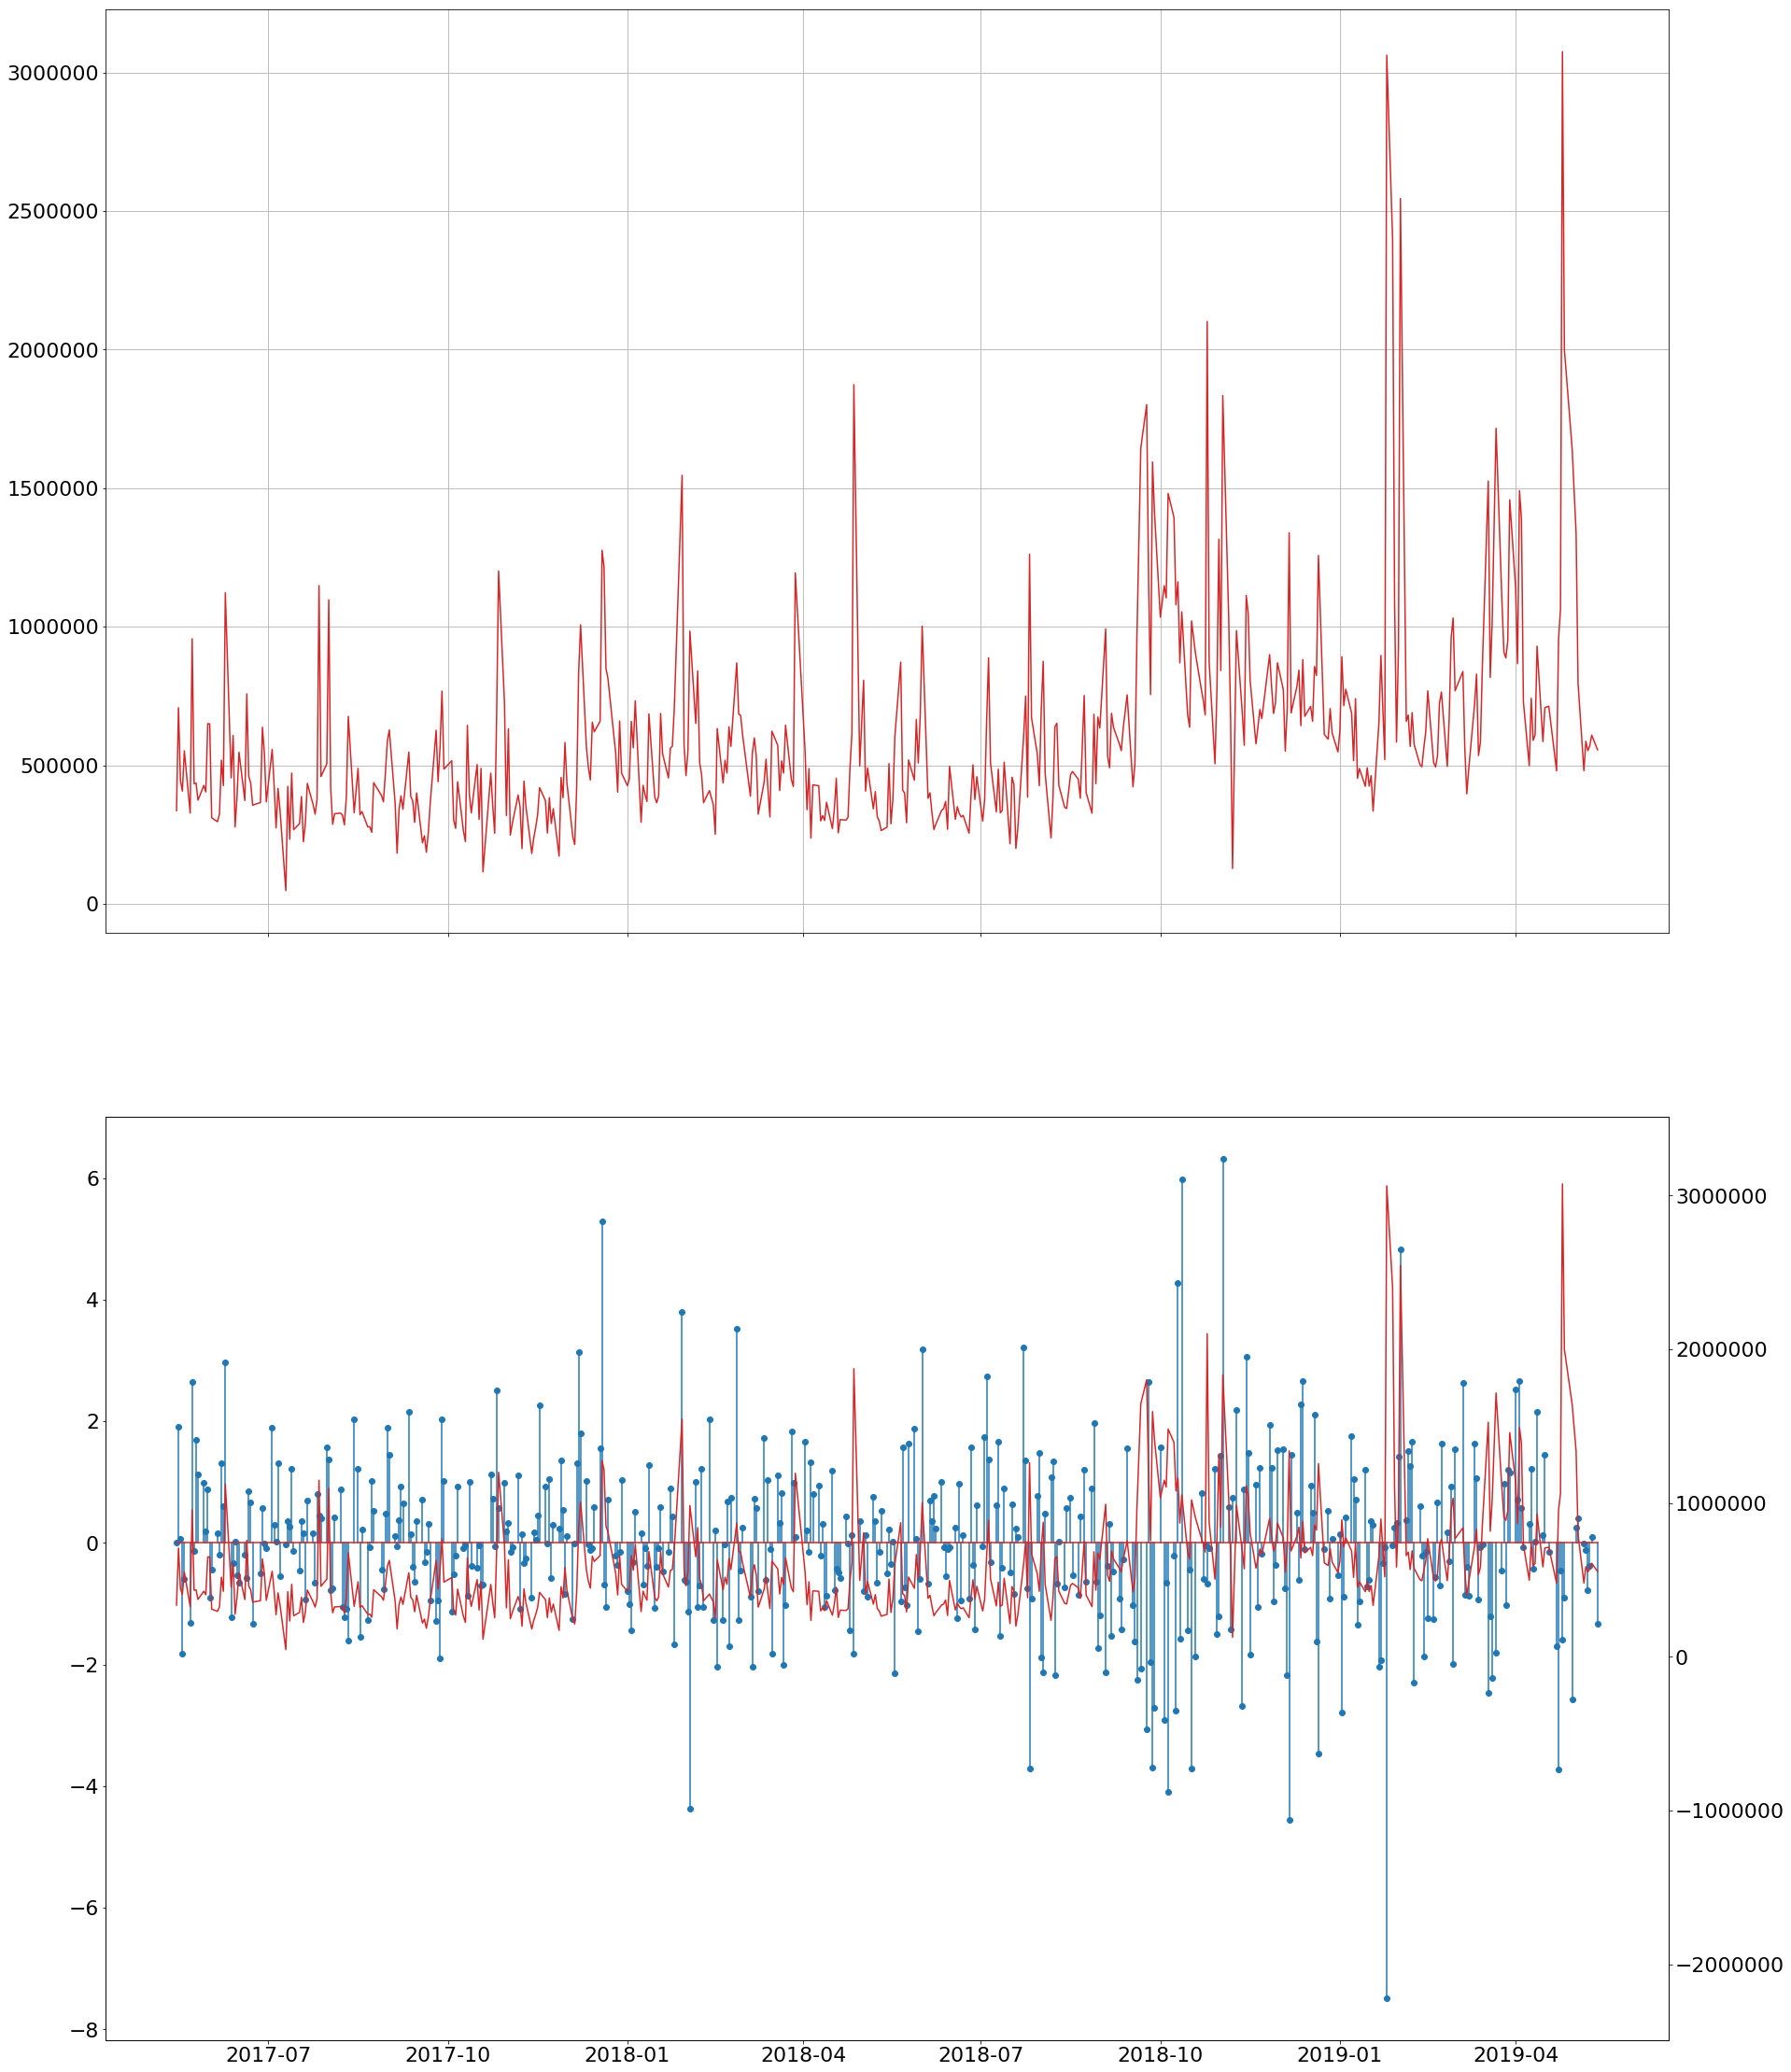

In [7]:
fig2,(ax2,ax3)=plt.subplots(2,1,sharex=True,figsize=(30,40))
ax2.grid(True)
ax2.plot(df['Date'],df['Total Traded Quantity'],color='tab:red')
ax3.stem(df['Date'],df['Day_Perc_Change'])
ax4=ax3.twinx()
ax4.plot(df['Date'],df['Total Traded Quantity'],color='tab:red')
ax4.set_ylim(df.loc[:,'Total Traded Quantity'].median()-3000000,df.loc[:,'Total Traded Quantity'].median()+3000000)

#### Analysis:
>Whenver the percentage change increases drastically the total traded quantity also increases by a lot 
>Also drastic decrease in the the value of the stock also tends to decrease the no of traded stcoks

### Query 2.4 
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days With the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 

In [8]:
trend_groups=df.groupby('Trend')
labels=[]
count=[]
avg=[]
median=[]

In [9]:
for group in trend_groups:
    labels.append(group[0])
    count.append(len(group[1]))
    avg.append(group[1]['Total Traded Quantity'].sum()/len(group[1]))
    median.append(group[1]['Total Traded Quantity'].median())

(-1.1122648229013543,
 1.1005840461512526,
 -1.1020948043402363,
 1.1199789750717752)

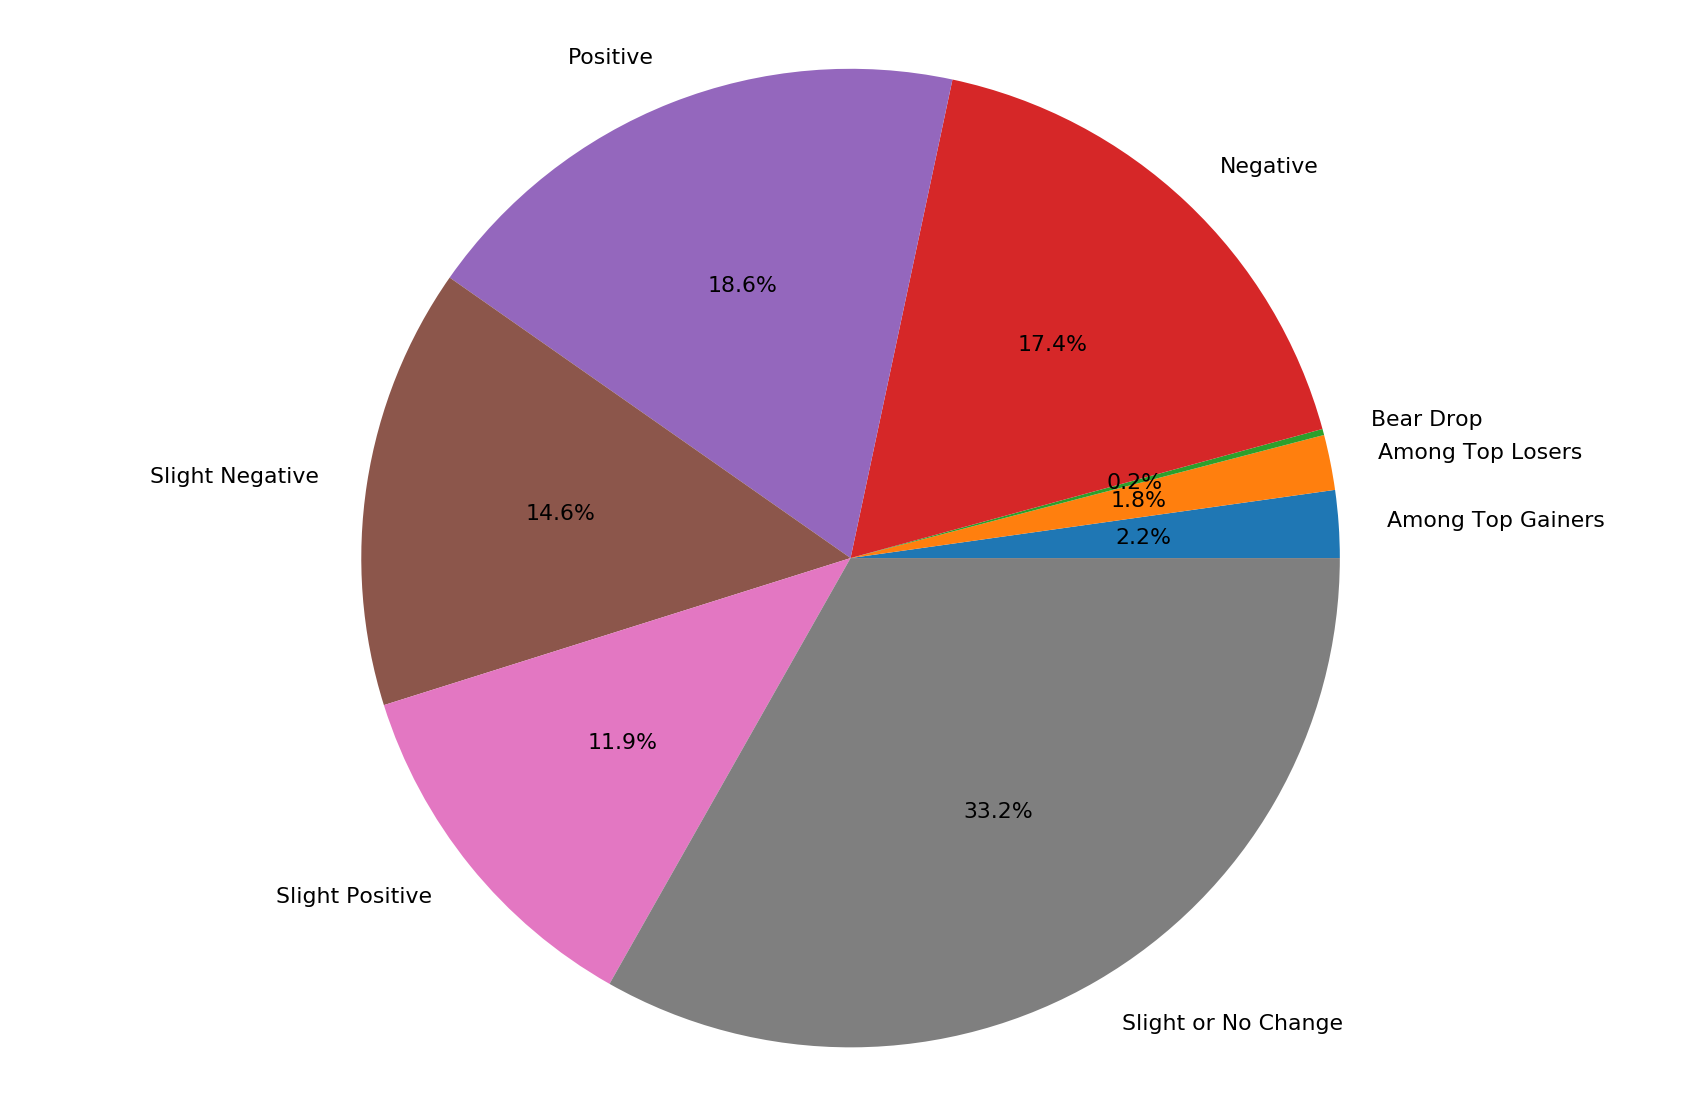

In [10]:
fig3, ax5 = plt.subplots(figsize=(30,20))
ax5.pie(count, labels=labels,autopct='%1.1f%%')
ax5.axis('equal')

Text(0,0.5,'Median')

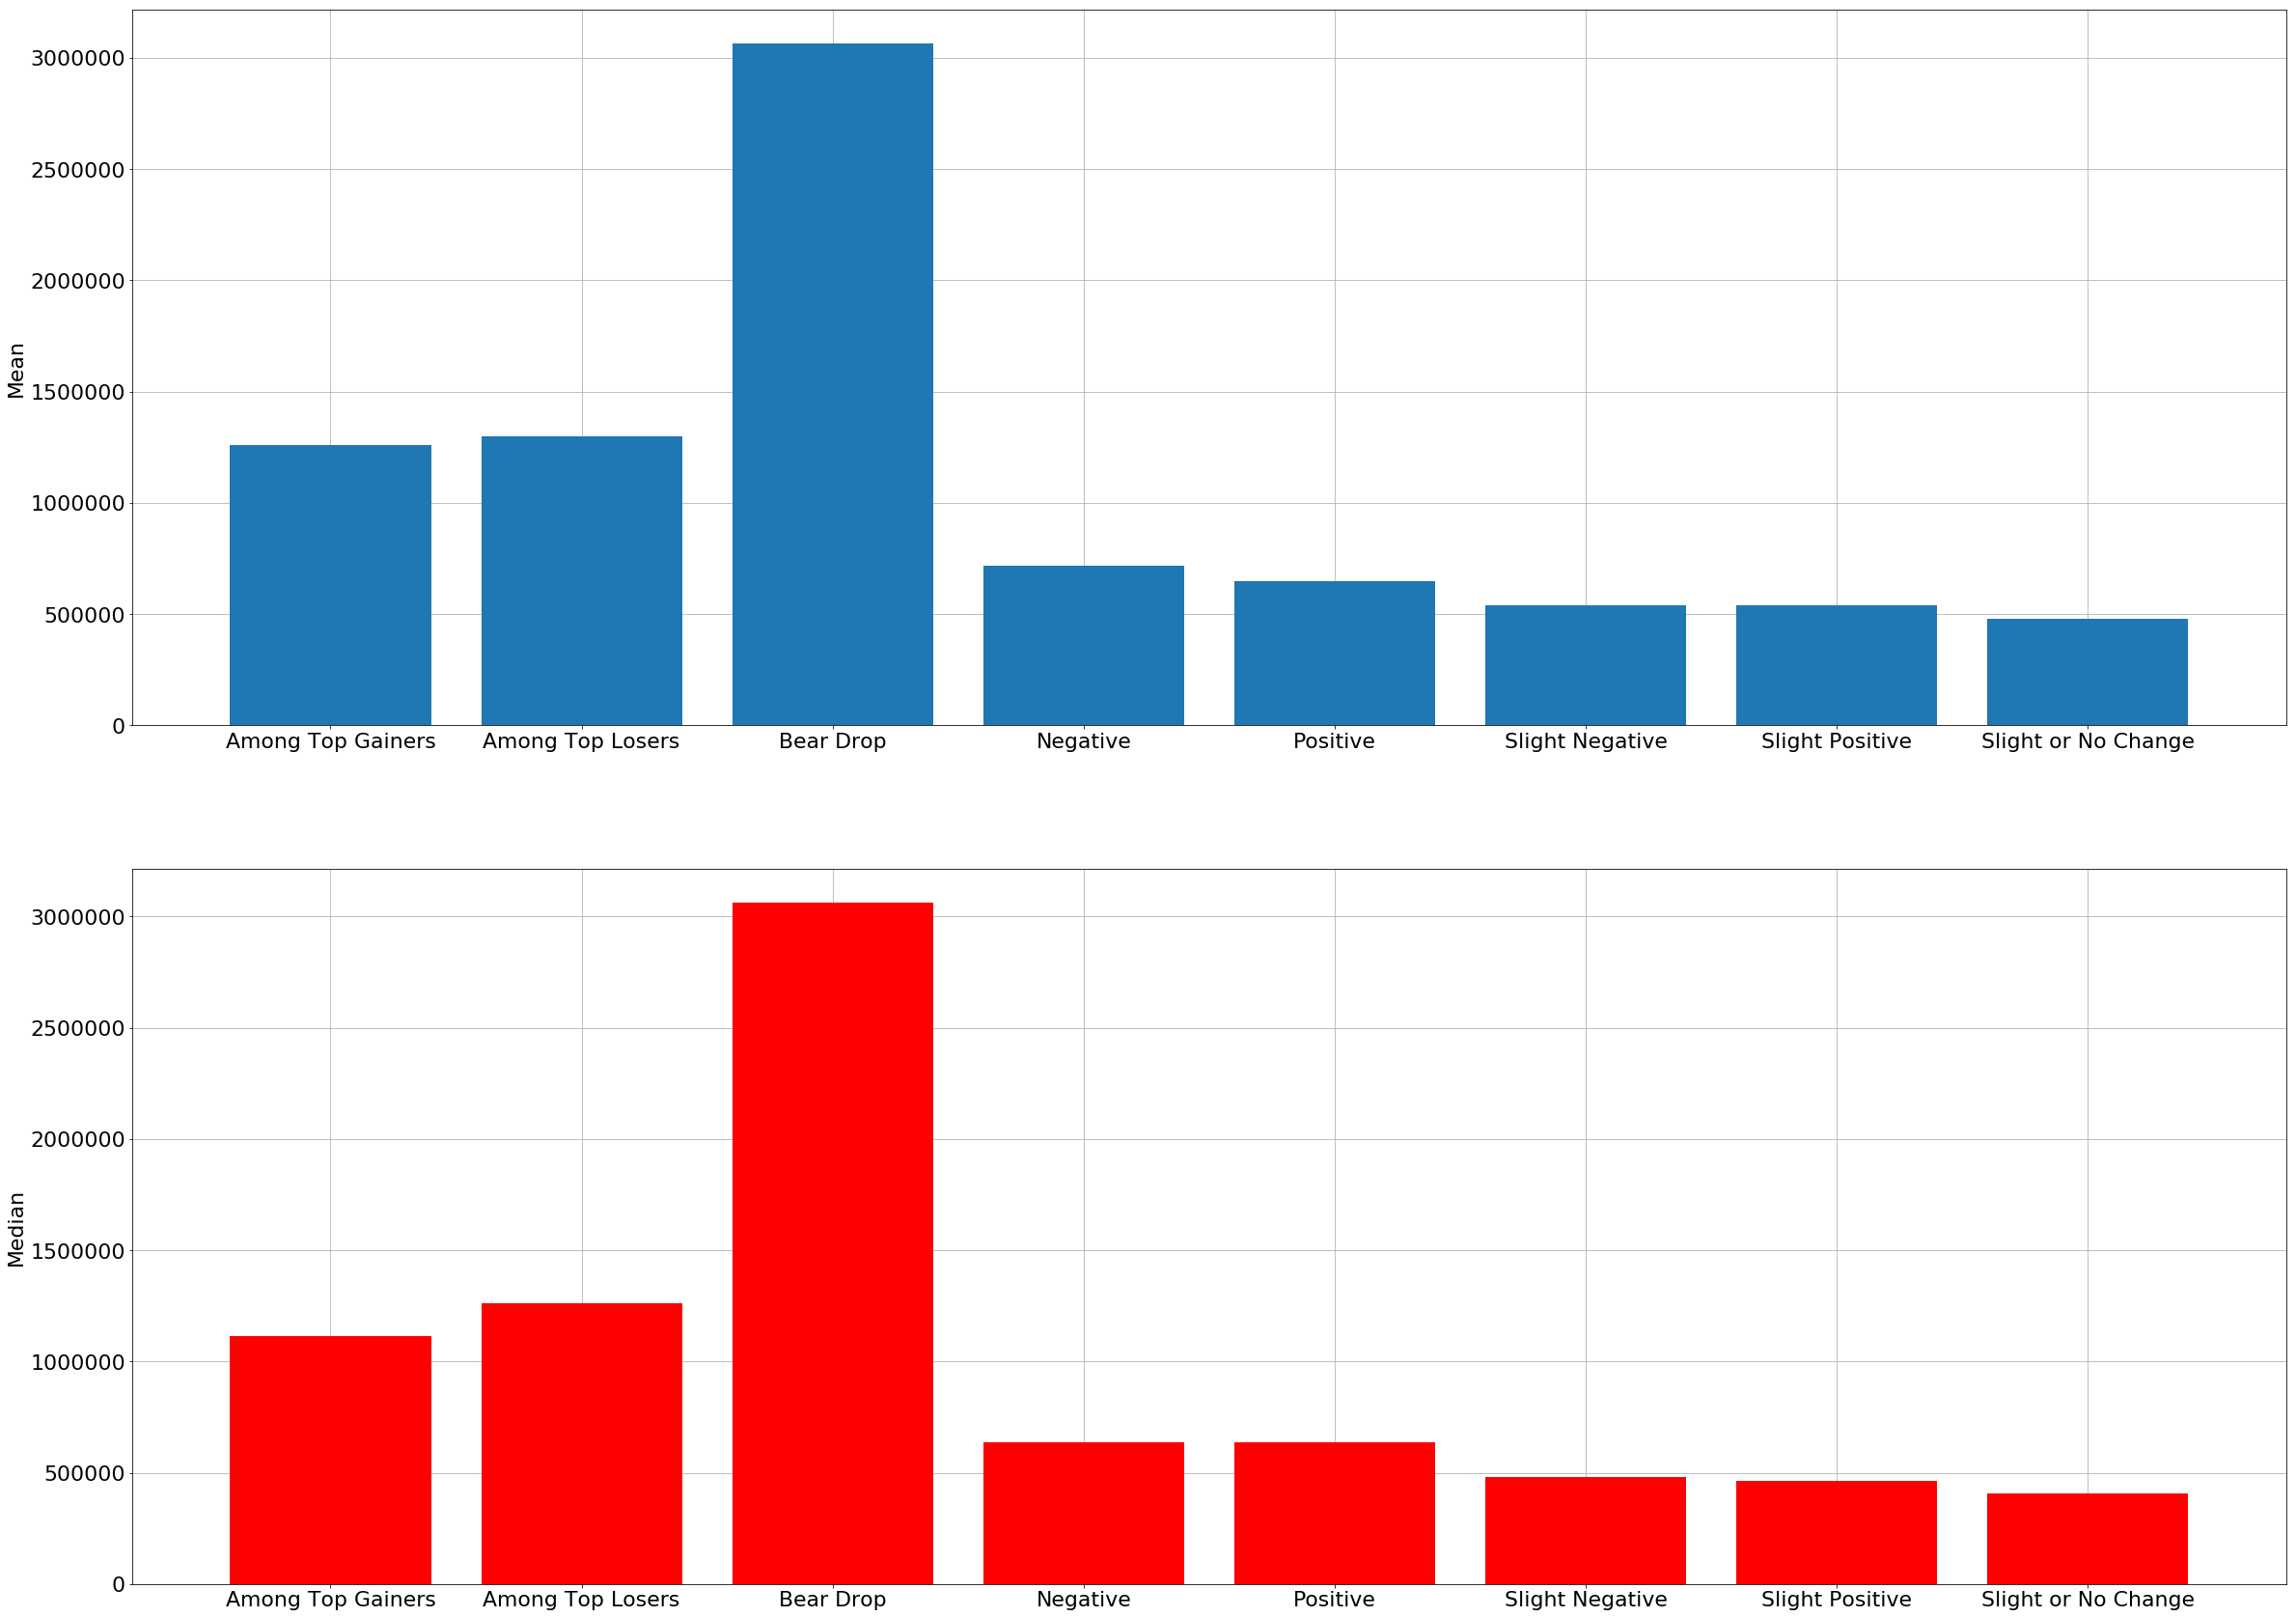

In [11]:
fig4,(ax6,ax7) = plt.subplots(2,1,figsize=(40,30))
ax6.grid(zorder=0)
ax7.grid(zorder=0)
ax6.bar(labels,avg,zorder=3)
ax6.set_ylabel('Mean')
ax7.bar(labels,median,color='red',zorder=3)
ax7.set_ylabel('Median')

In [12]:
np.linspace(math.floor(min(df['Day_Perc_Change'])),math.ceil(max(df['Day_Perc_Change'])),10)

array([-8.        , -6.33333333, -4.66666667, -3.        , -1.33333333,
        0.33333333,  2.        ,  3.66666667,  5.33333333,  7.        ])

### Query 2.5
Plot the daily return (percentage) distribution as a histogram. Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes

(array([  1.,   0.,   0.,   3.,   6.,  20.,  66., 162., 133.,  74.,  18.,
          6.,   2.,   2.]),
 array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6]),
 <a list of 14 Patch objects>)

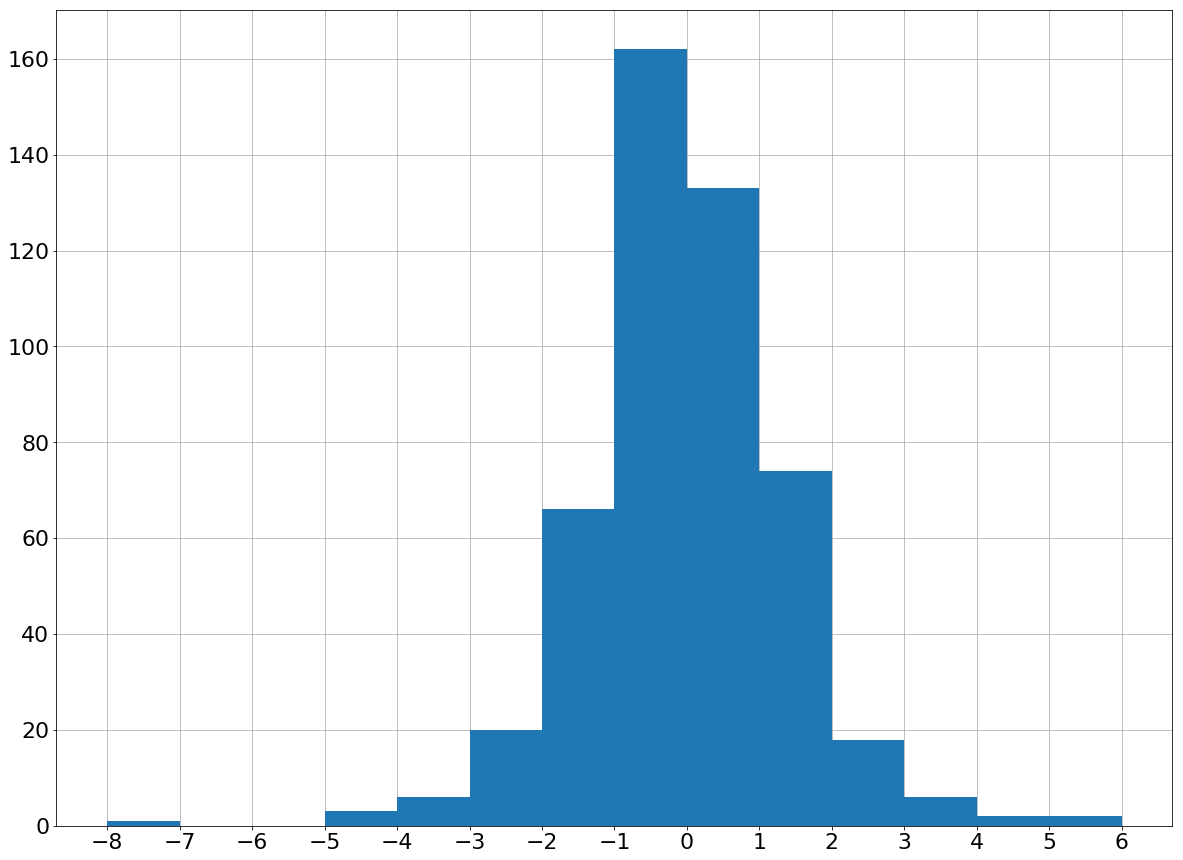

In [13]:
fig4, ax8 = plt.subplots(figsize=(20,15))
ax8.grid(zorder=0)
plt.xticks(np.linspace(math.floor(min(df['Day_Perc_Change'])),math.ceil(max(df['Day_Perc_Change'])),16))
ax8.hist(df['Day_Perc_Change'],bins=range(math.floor(min(df['Day_Perc_Change'])),math.ceil(max(df['Day_Perc_Change']))),zorder=3)

### Query 2.6

We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.<br>
Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which 'Series' column has value 'EQ'. Create a single dataframe which contains the 'Closing Price' of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan's from this dataframe. Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification.

In [14]:
stocks=["APOLLOTYRE.csv","EXIDEIND.csv","GODREJIND.csv","MUTHOOTFIN.csv","VOLTAS.csv"]
df_array=[] #list of all the dfs beign loaded
combined_df=pd.DataFrame() #dataframe of Close price of each value
for stock in stocks:
    df_array.append(pd.read_csv(stock))
    combined_df[stock[0:-4]]=[]
for i in range(len(df_array)):
    df_array[i]=df_array[i][df_array[i]['Series']=='EQ']
    df_array[i].reset_index(drop=True,inplace=True)
    combined_df[stocks[i][0:-4]]=df_array[i]['Close Price']

In [15]:
columns=list(combined_df.columns)
pctChange_df=pd.DataFrame()# Dataframe storing the precentage change 

In [16]:
for column in columns:
    pctChange_df[column]=combined_df[column].pct_change()*100
pctChange_df.dropna(axis=0,inplace=True)
pctChange_df.reset_index(drop=True,inplace=True)

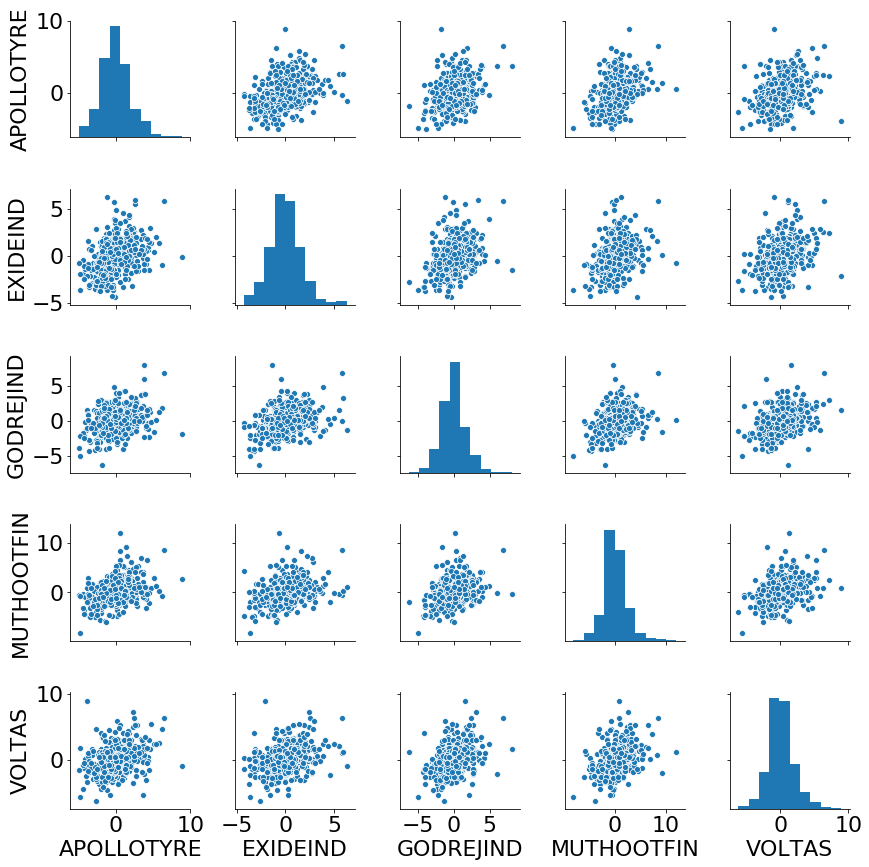

In [17]:
sns.pairplot(pctChange_df)
plt.show()


In [18]:
pctChange_df.head()

,APOLLOTYRE,EXIDEIND,GODREJIND,MUTHOOTFIN,VOLTAS
0,1.078051,-0.447518,1.080287,0.598802,0.138937
1,1.258532,-0.612996,0.649795,0.088652,-0.520291
2,-1.980198,-1.377467,-2.378525,-4.036442,-3.742445
3,0.859660,-0.708776,0.591716,-0.013186,0.398454
4,-0.383550,-3.086290,-2.084775,1.661611,-0.024053


### Query 2.7 
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.<br>
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.

In [19]:

apollo_vol=np.zeros((len(pctChange_df)))
def volatility(days,frame,arr,field):
    for i in range(len(frame)):
        tot=np.float64(0)
        avg=np.float64(0)
        var=np.float64(0)
        std=np.float64(0)
        try:
            for j in range(days):
                tot=tot+frame.loc[i-j,field]
            avg=tot/days
            for k in range(days):
                var=var+(frame.loc[i-k,field]-avg)**2
            var=var/days
            std=np.sqrt(var)
        except:
            std=np.nan
        finally:
            arr[i]=std
volatility(7,pctChange_df,apollo_vol,'APOLLOTYRE')

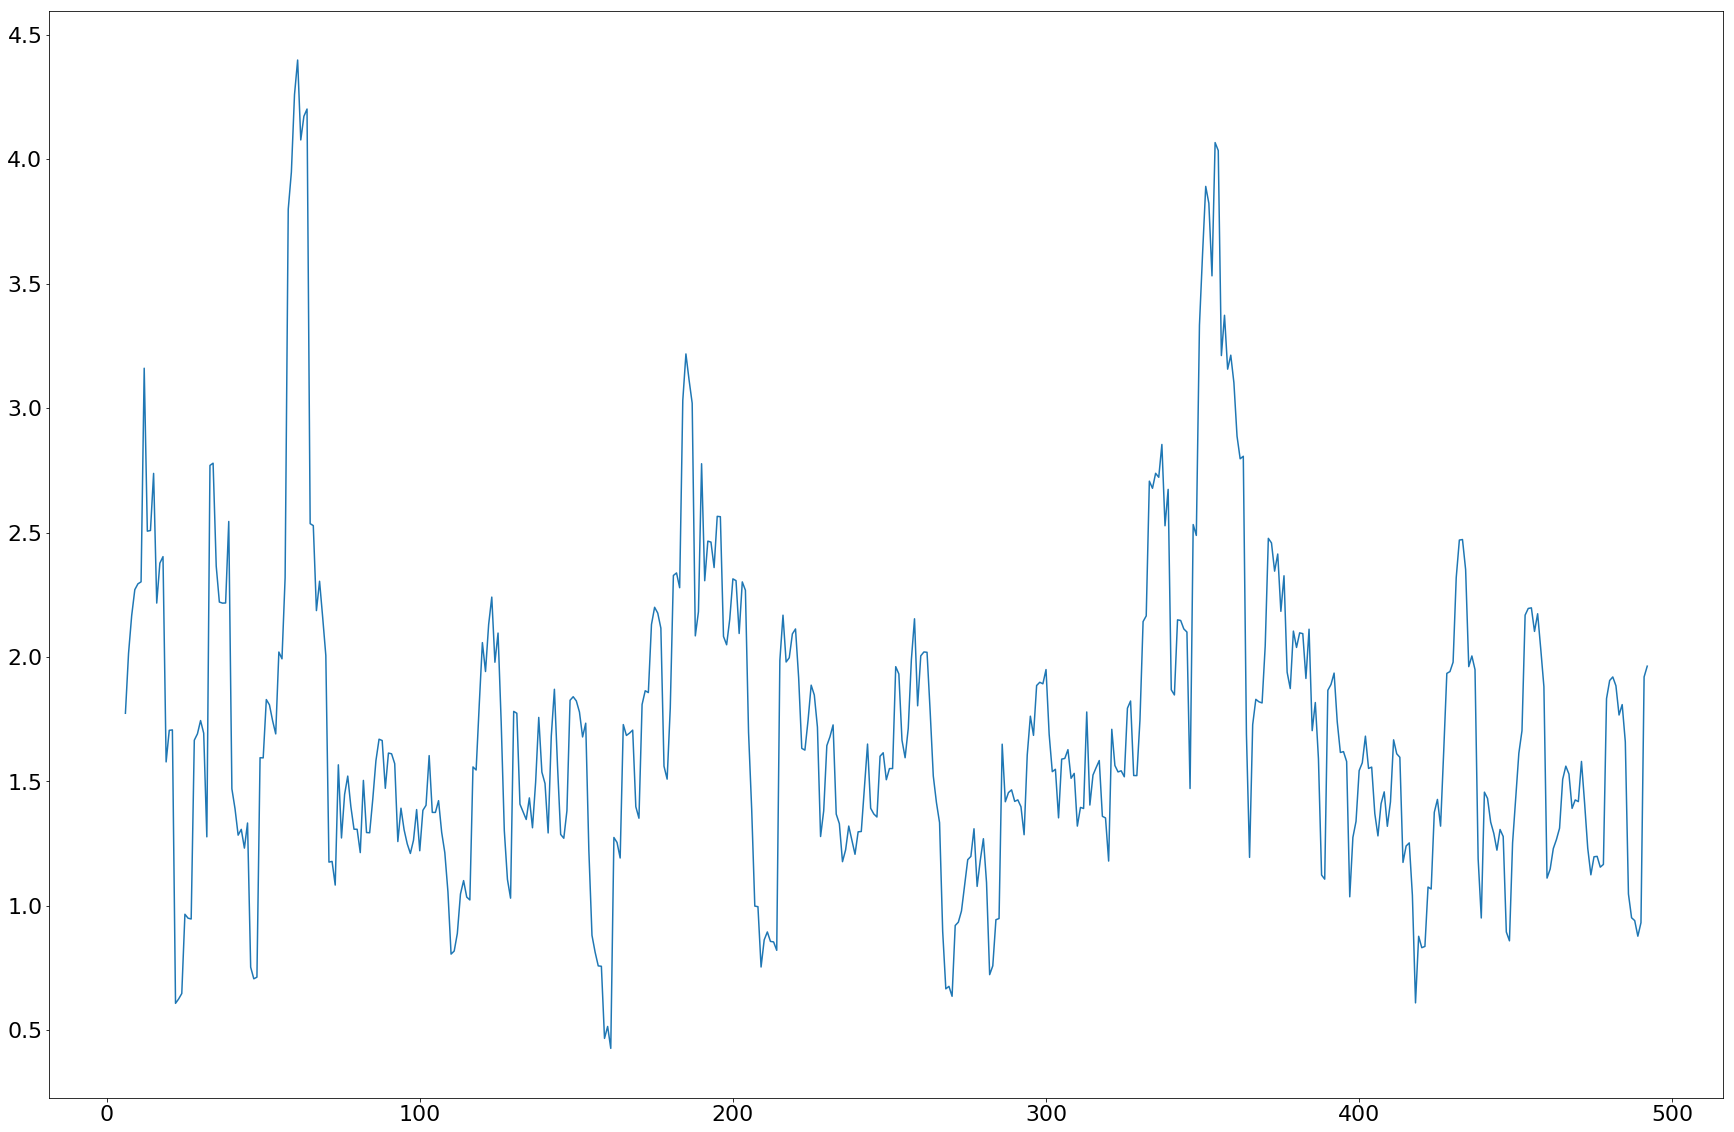

In [20]:
fig5, ax9=plt.subplots(figsize=(30,20))
ax9.plot(apollo_vol)

### Qyery 2.8 
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [21]:
nifty=pd.read_csv('Nifty50.csv')
nifty['Pct Change']=nifty['Close'].pct_change()*100
nifty.dropna(axis=0,inplace=True)
nifty_vol=np.zeros((len(nifty)))
volatility(7,nifty,nifty_vol,'Pct Change')

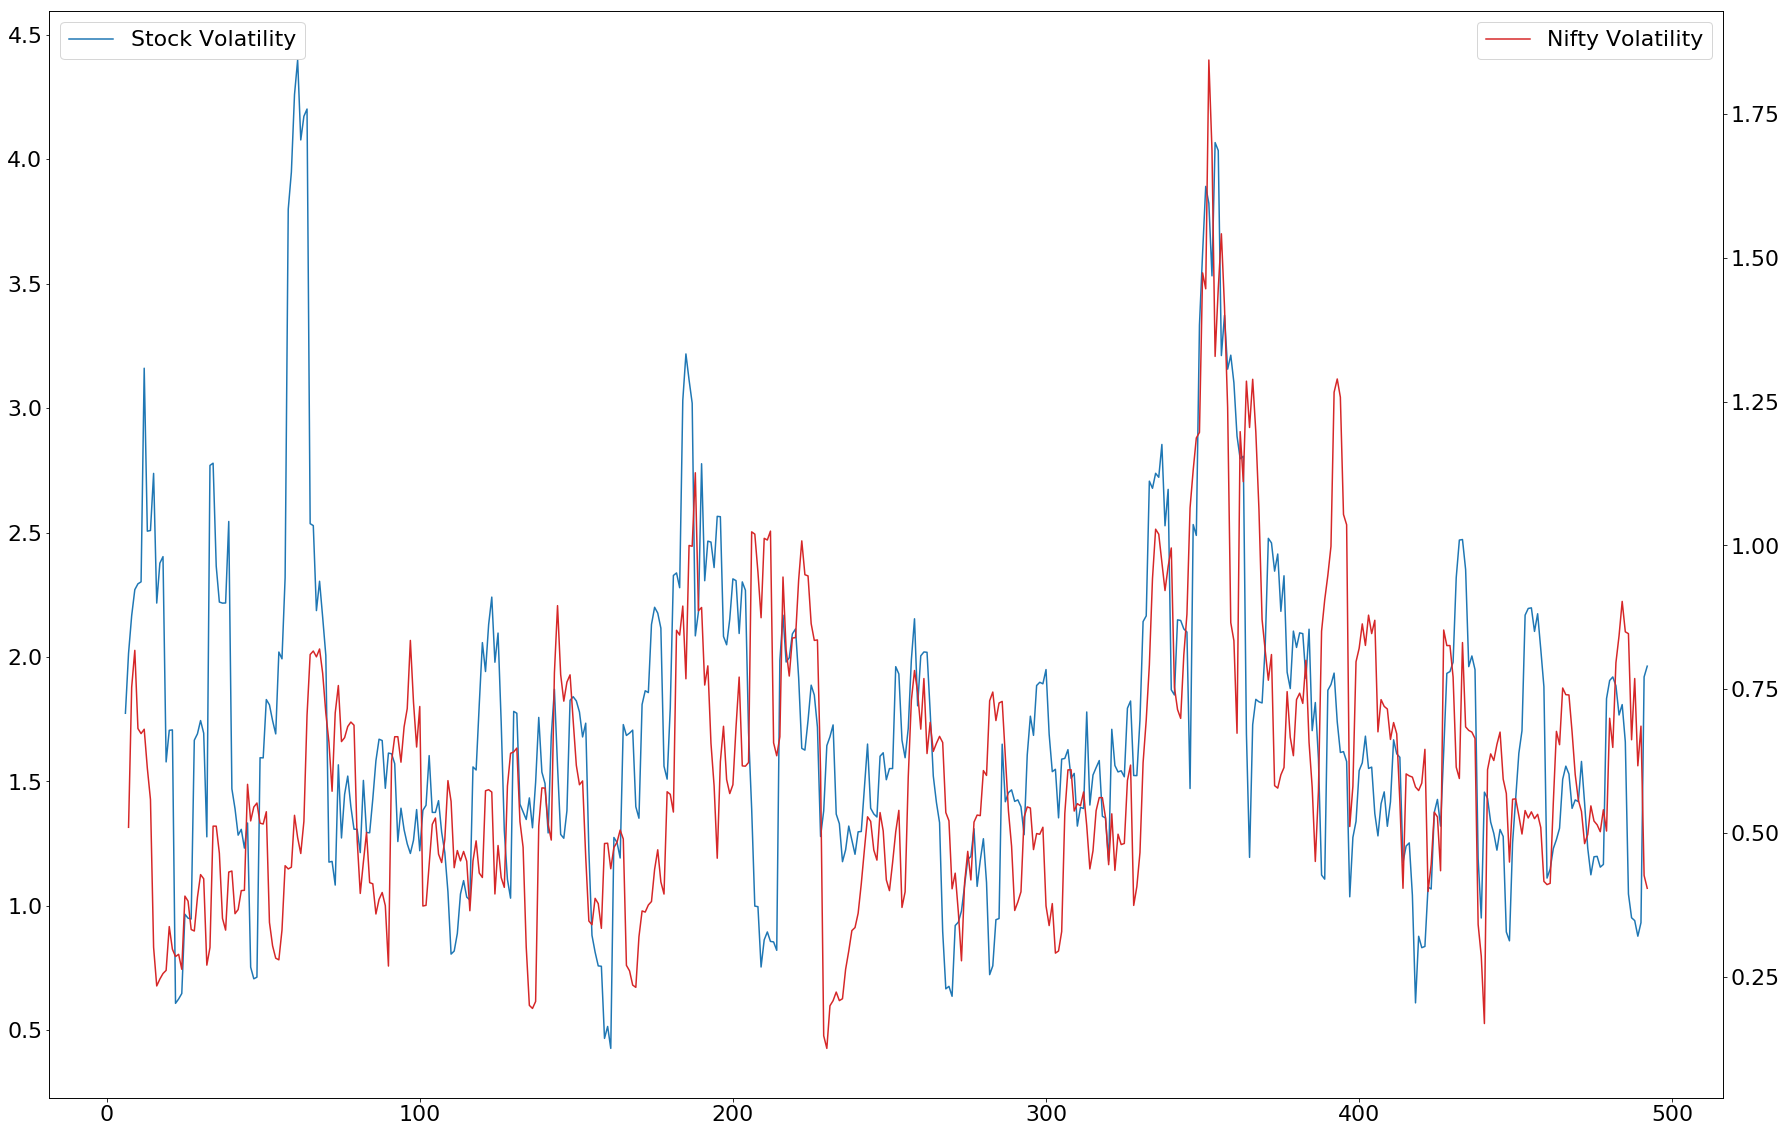

In [22]:
fig6,(ax10)=plt.subplots(figsize=(30,20))
ax10.plot(apollo_vol,label='Stock Volatility')
ax11=ax10.twinx()
ax11.plot(nifty_vol,color='tab:red',label='Nifty Volatility')
ax11.legend()
ax10.legend(loc='upper left')

### Query2.9 
Trade calls - using Simple Moving Averages. Study about moving averages here.<br>
Plot the 21 day and 34 day Moving average with the average price and decide a Call ! Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. One of the most widely used technical indicators.

In [23]:
apollo_df=df_array[0].copy()
apollo_df['21 day moving average']=np.nan
apollo_df['34 day moving average']=np.nan
apollo_df['Call']=""
def moving_avg(days,frame):
    for i in range(len(frame)):
        tot=np.float64(0)
        avg=np.float64(0)
        try:
            for j in range(days):
                tot=tot+frame.loc[i-j,'Average Price']
            avg=tot/days
        except:
            avg=np.nan
        finally:
            frame.loc[i,'{} day moving average'.format(days)]=avg
    

In [24]:
moving_avg(21,apollo_df)
moving_avg(34,apollo_df)


In [25]:
for i in range(len(df)):
    if not(np.isnan(apollo_df.loc[i,'21 day moving average']) or np.isnan(apollo_df.loc[i,'34 day moving average'])):
        if apollo_df.loc[i,'21 day moving average']>apollo_df.loc[i,'34 day moving average']:
            apollo_df.loc[i,'Call']='Buy'
        elif apollo_df.loc[i,'21 day moving average']<apollo_df.loc[i,'34 day moving average']:
            apollo_df.loc[i,'Call']='Sell'
    else:
        apollo_df.loc[i,'Call']='N/A'


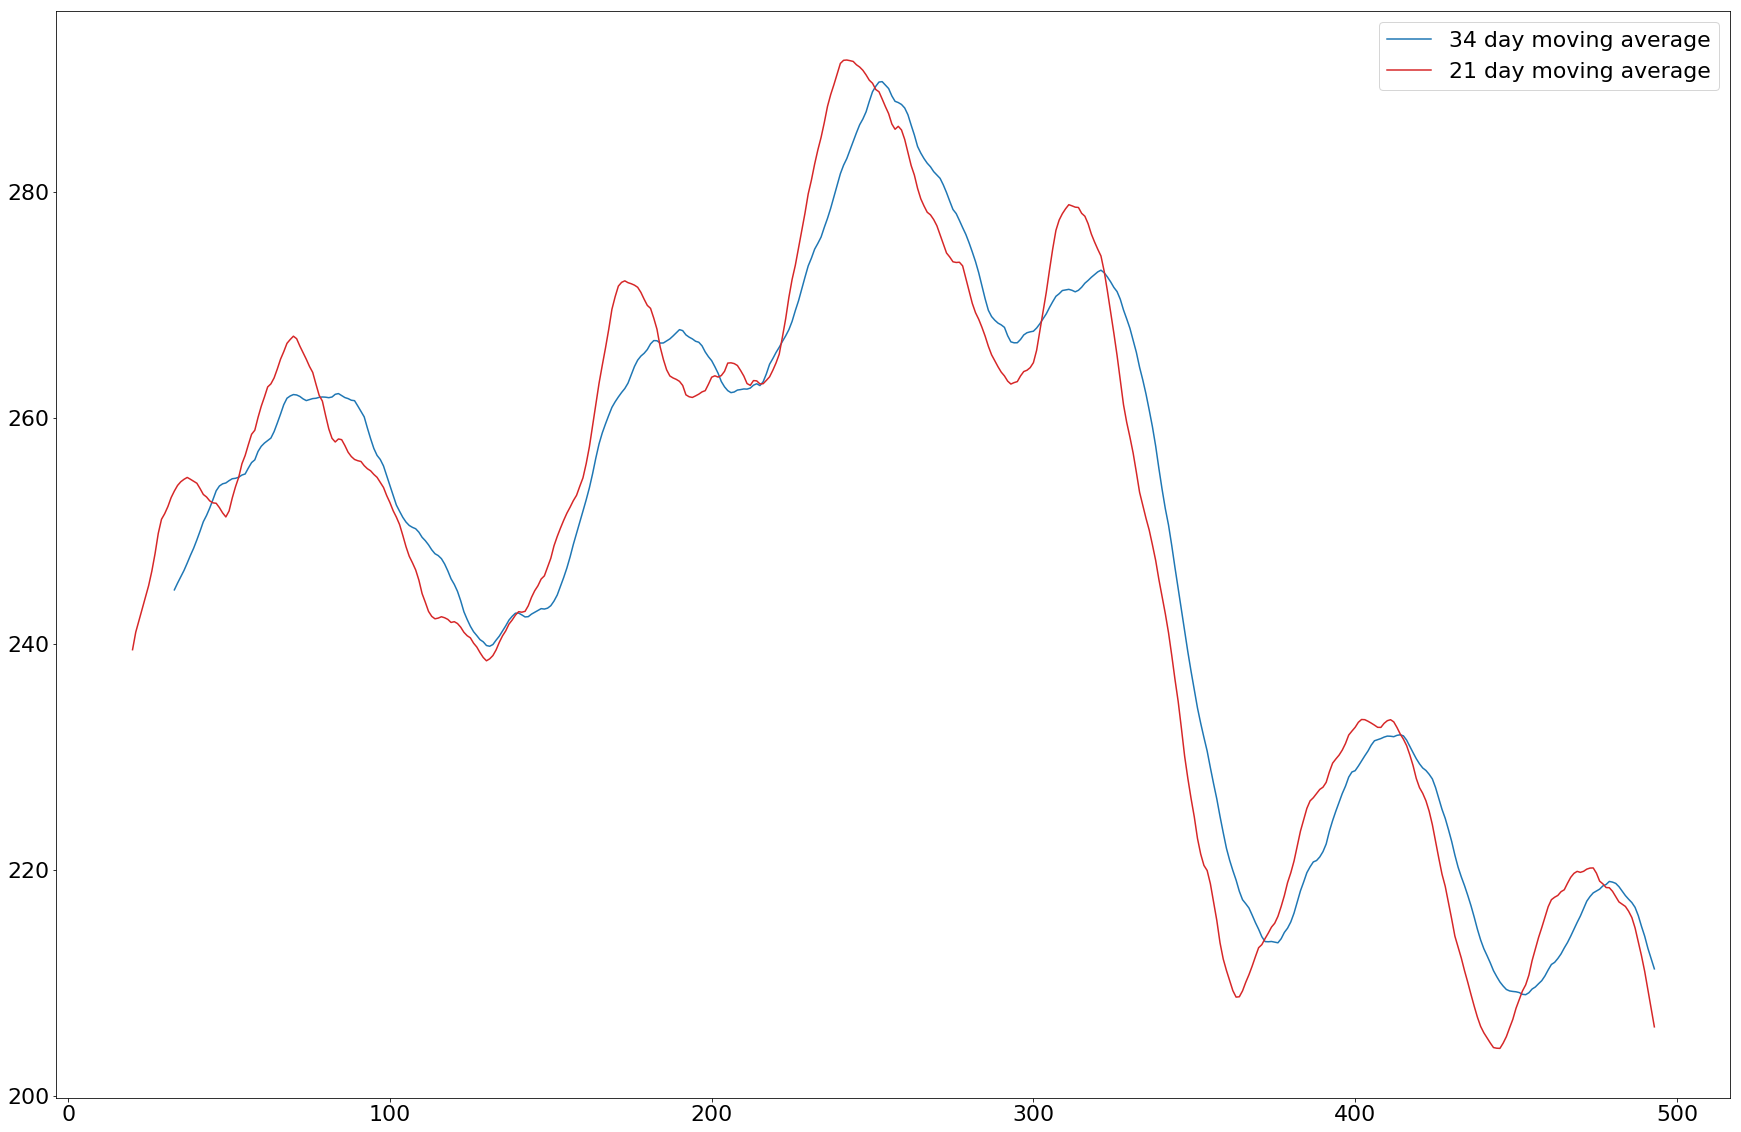

In [26]:
fig7,ax12=plt.subplots(figsize=(30,20))
ax12.plot(apollo_df['34 day moving average'])
ax12.plot(apollo_df['21 day moving average'],color='tab:red')
ax12.legend()

### Query 2.10 
Trade Calls - Using Bollinger Bands<br>
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average<br>
The bollinger bands comprise the following data points- 
>The 14 day rolling mean of the closing price (we call it the average)

>Upper band which is the rolling mean + 2 standard deviations away from the average. 

>Lower band which is the rolling mean - 2 standard deviations away from the average.

> Average Daily stock price.<br>

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. Save to a new csv file.

In [32]:
apollo_df['BOLU']=np.nan
apollo_df['BOLD']=np.nan
apollo_df['BOLMA']=np.nan
apollo_df['Typical Price']=(apollo_df['High Price']+apollo_df['Low Price']+apollo_df['Close Price'])/3
def bollinger_band(days,frame):
    for i in range(len(frame)):
        tot=np.float64(0)
        avg=np.float64(0)
        var=np.float64(0)
        std=np.float64(0)
        try:
            for j in range(days):
                tot=tot+frame.loc[i-j,'Typical Price']
            avg=tot/days
            for k in range(days):
                var=var+(frame.loc[i-k,'Typical Price']-avg)**2
            var=var/days
            std=np.sqrt(var)
        except:
            avg=np.nan
            std=np.nan
        finally:
            apollo_df.loc[i,'BOLU']=avg+2*std
            apollo_df.loc[i,'BOLD']=avg-2*std
            apollo_df.loc[i,'BOLMA']=avg

In [33]:
bollinger_band(14,apollo_df)

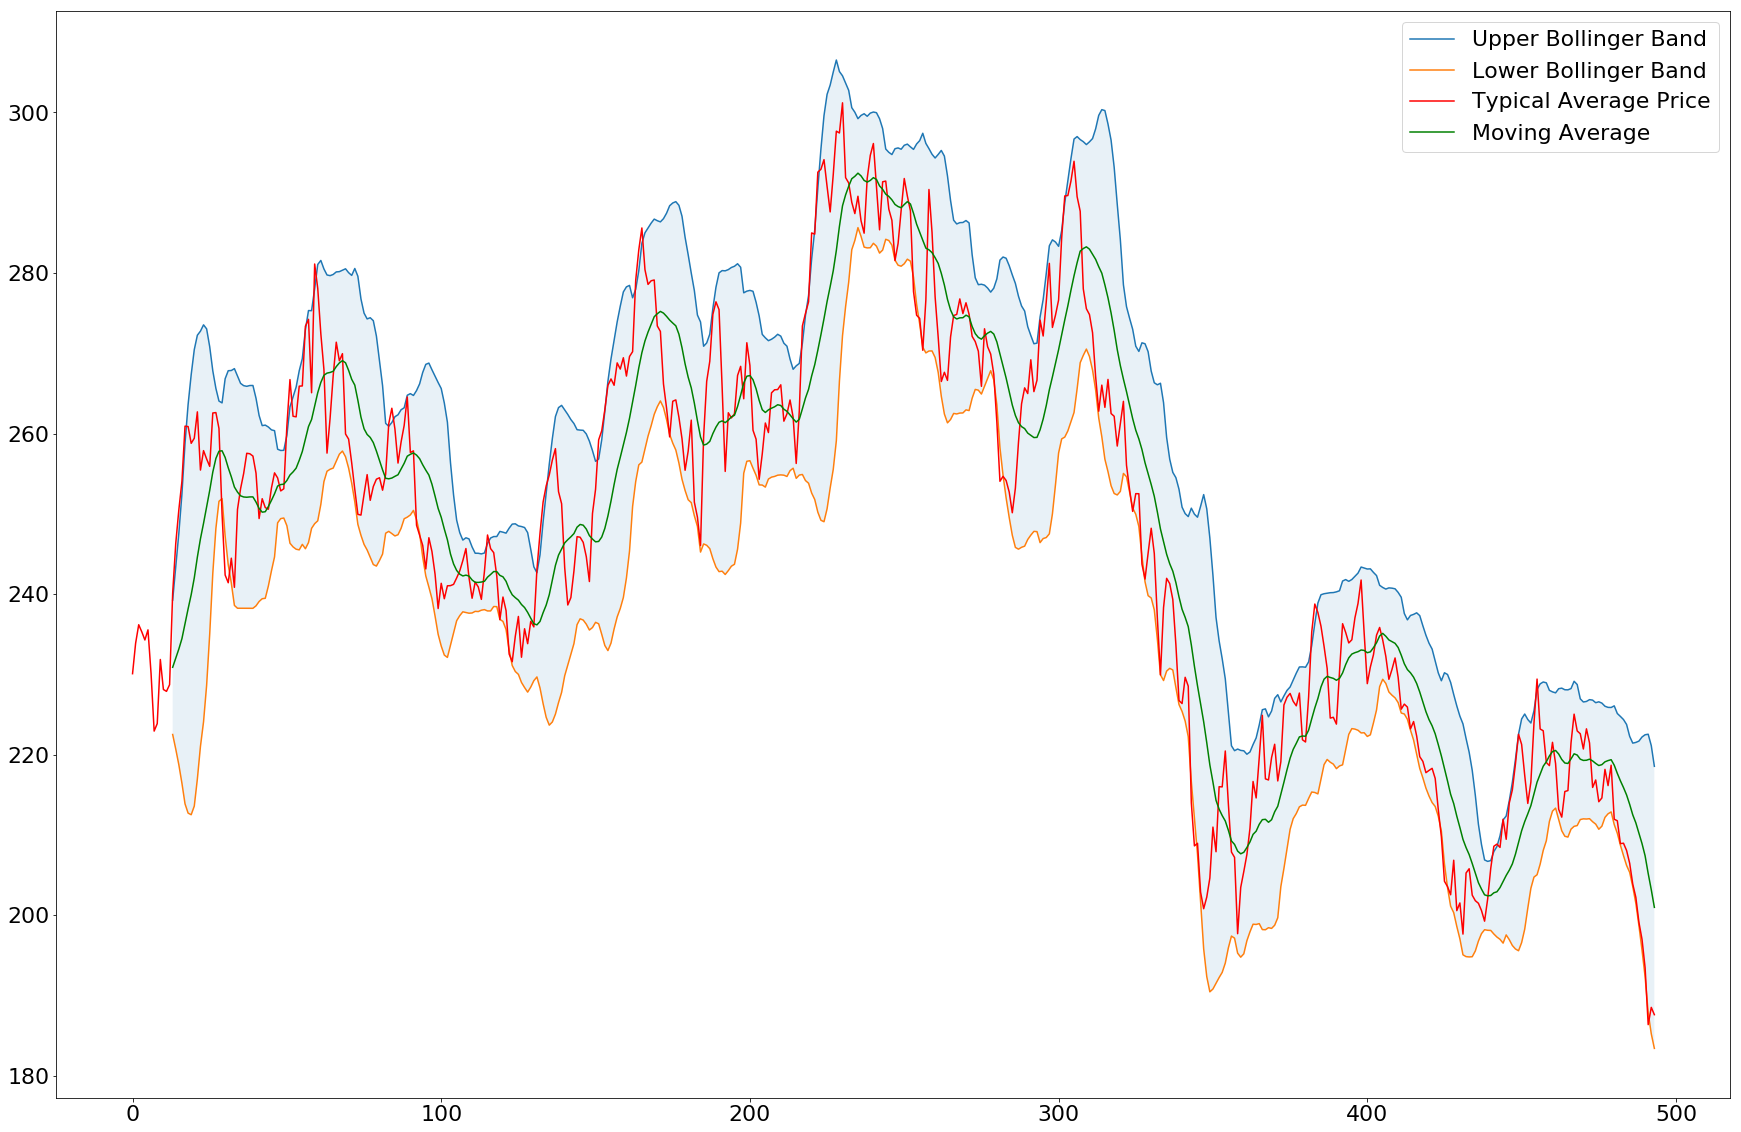

In [35]:
fig8,ax13=plt.subplots(figsize=(30,20))
x=apollo_df.index
ax13.plot(apollo_df['BOLU'],label='Upper Bollinger Band')
ax13.plot(apollo_df['BOLD'],label='Lower Bollinger Band')
ax13.plot(apollo_df['Average Price'],color='red',label='Typical Average Price')
ax13.plot(apollo_df['BOLMA'],color='green',label='Moving Average')
ax13.fill_between(x,apollo_df['BOLU'],apollo_df['BOLD'],alpha=0.1)


ax13.legend()

In [30]:
combined_df.to_csv('Comnined Close Prices.csv')
pctChange_df.to_csv('Percentage Change.csv')
apollo_df.to_csv('Trade Calls.csv')